In [1]:
import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import regularizers

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from tensorflow.keras import backend as K
assert len(keras.backend.tensorflow_backend._get_available_gpus()) > 0

# Train the ANNs

In [4]:
costs = pd.read_csv("~/code/fifteen-puzzle/data/datasets/15-costs-v3.csv")
costs.shape

(6000000, 17)

In [5]:
costs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,cost
0,10,1,5,4,14,11,15,7,0,9,3,2,6,8,12,13,48
1,1,7,12,2,5,0,6,3,9,8,14,4,13,11,10,15,26
2,6,9,4,1,13,0,12,10,7,5,11,14,3,15,8,2,54
3,15,5,0,6,9,4,8,11,10,13,2,1,12,3,14,7,54
4,6,7,12,4,0,15,11,3,13,10,1,5,9,14,8,2,53


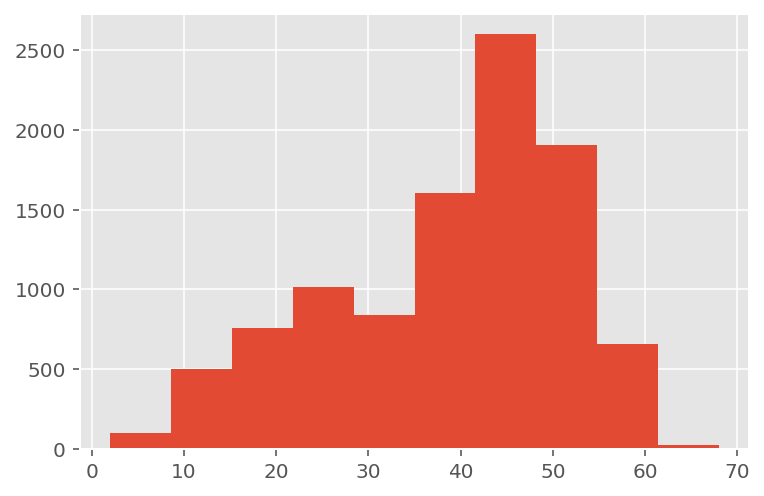

In [6]:
costs.sample(10000).cost.hist(bins=10);

In [7]:
X_raw = costs.iloc[:,:-1].values
y = costs['cost'].values

In [8]:
X = np.apply_along_axis(lambda x: np.eye(16)[x].ravel(), 1, X_raw)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

In [10]:
del X, y

In [11]:
def get_model(layer_sizes, 
              learning_rate=0.001, 
              dropout_ratio=0.2, 
              activation='elu', 
              loss='mean_squared_error',
              kernel_initializer='he_normal', 
              batch_normalize=True,
              kernel_regularizer=None):
    model = Sequential()
    model.add(Dense(layer_sizes[0], 
                    input_shape=(256,), 
                    activation=activation, 
                    kernel_initializer=kernel_initializer,
                    kernel_regularizer=kernel_regularizer))
    model.add(Activation(activation))
    if batch_normalize:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_ratio))
    
    for layer_size in layer_sizes[1:]:
        model.add(Dense(layer_size, 
                        activation=activation, 
                        kernel_initializer=kernel_initializer,
                        kernel_regularizer=kernel_regularizer))
        model.add(Activation(activation))
        if batch_normalize:
            model.add(BatchNormalization())
        model.add(Dropout(dropout_ratio))

    model.add(Dense(1, kernel_initializer='he_normal', kernel_regularizer=kernel_regularizer))
    model.compile(loss=loss,
                  optimizer=Adam(lr=learning_rate))
    return model

## Initial experiments

In [13]:
model = get_model([15], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 64s 13us/sample - loss: 25.3823 - val_loss: 7.7419
Epoch 2/100
4800000/4800000 [==============================] - 61s 13us/sample - loss: 12.1440 - val_loss: 7.4210
Epoch 3/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 12.0567 - val_loss: 7.5353
Epoch 4/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 12.0554 - val_loss: 7.2117
Epoch 5/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 12.0418 - val_loss: 7.3295
Epoch 6/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 12.0284 - val_loss: 7.4610
Epoch 7/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 12.0202 - val_loss: 7.2063
Epoch 8/100
4800000/4800000 [==============================] - 61s 

KeyboardInterrupt: 

In [14]:
model = get_model([500], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 8.0008 - val_loss: 3.1309
Epoch 2/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 5.4179 - val_loss: 2.9020
Epoch 3/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 5.0405 - val_loss: 4.2036
Epoch 4/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 4.7940 - val_loss: 2.6208
Epoch 5/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 4.6407 - val_loss: 2.7119
Epoch 6/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 4.4608 - val_loss: 2.9327
Epoch 7/100
4800000/4800000 [==============================] - 62s 13us/sample - loss: 4.3300 - val_loss: 2.5436
Epoch 8/100
4800000/4800000 [==============================] - 61s 13us/sample - loss: 4.2245 - val_loss: 2.9734
Epoch 9/100
4800000/4800000 [=============

KeyboardInterrupt: 

In [15]:
model = get_model([100, 100, 100, 100, 100], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 13.3002 - val_loss: 4.0712
Epoch 2/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 7.8001 - val_loss: 4.6459
Epoch 3/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 6.8031 - val_loss: 3.5528
Epoch 4/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 6.4332 - val_loss: 4.2553
Epoch 5/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 6.2579 - val_loss: 4.0340
Epoch 6/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 6.1847 - val_loss: 3.9218
Epoch 7/100
4800000/4800000 [==============================] - 143s 30us/sample - loss: 6.1346 - val_loss: 3.5830
Epoch 8/100
4800000/4800000 [==============================] - 142s 30us/sample - loss: 6.0986 - val_loss: 3.6551
Epoch 9/100
4800000/4800000 [====

KeyboardInterrupt: 

In [16]:
model = get_model([100, 100, 100, 100, 100], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  batch_normalize=False)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 67s 14us/sample - loss: 202.4892 - val_loss: 13.4314
Epoch 2/100
4800000/4800000 [==============================] - 66s 14us/sample - loss: 115237.4813 - val_loss: 164.7734
Epoch 3/100
4800000/4800000 [==============================] - 66s 14us/sample - loss: 167.3936 - val_loss: 164.8833
Epoch 4/100
4800000/4800000 [==============================] - 66s 14us/sample - loss: 549129.0161 - val_loss: 175.0603
Epoch 5/100
 420864/4800000 [=>............................] - ETA: 54s - loss: 18380.3153

KeyboardInterrupt: 

In [17]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 159s 33us/sample - loss: 12.8883 - val_loss: 3.5692
Epoch 2/100
4800000/4800000 [==============================] - 158s 33us/sample - loss: 5.7667 - val_loss: 2.5786
Epoch 3/100
4800000/4800000 [==============================] - 158s 33us/sample - loss: 4.7603 - val_loss: 3.1555
Epoch 4/100
4800000/4800000 [==============================] - 158s 33us/sample - loss: 4.4252 - val_loss: 309.1072
Epoch 5/100
4800000/4800000 [==============================] - 159s 33us/sample - loss: 4.2636 - val_loss: 2.2508
Epoch 6/100
4800000/4800000 [==============================] - 159s 33us/sample - loss: 4.1511 - val_loss: 4436.3405
Epoch 7/100
4800000/4800000 [==============================] - 159s 33us/sample - loss: 4.0706 - val_loss: 14.5775
Epoch 8/100
4800000/4800000 [==============================] - 159s 33us/sample - loss: 4.0452 - val_loss: 32.9513
Epoch 9/100
4800000/480000

KeyboardInterrupt: 

In [ ]:
model = get_model([5000], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 94s 20us/sample - loss: 7.3008 - val_loss: 2.8402
Epoch 2/100
4800000/4800000 [==============================] - 92s 19us/sample - loss: 5.1486 - val_loss: 3.7827
Epoch 3/100
4800000/4800000 [==============================] - 92s 19us/sample - loss: 4.8529 - val_loss: 4.8270
Epoch 4/100
4800000/4800000 [==============================] - 93s 19us/sample - loss: 4.6608 - val_loss: 2.5731
Epoch 5/100
2498304/4800000 [==============>...............] - ETA: 39s - loss: 4.6195

In [14]:
model = get_model([5, 5, 5], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 224s 47us/sample - loss: 48.8194 - val_loss: 11.4369
Epoch 2/100
4800000/4800000 [==============================] - 219s 46us/sample - loss: 26.1217 - val_loss: 10.8959
Epoch 3/100
4800000/4800000 [==============================] - 218s 45us/sample - loss: 26.0487 - val_loss: 10.8269
Epoch 4/100
4800000/4800000 [==============================] - 222s 46us/sample - loss: 26.0719 - val_loss: 12.0236
Epoch 5/100
4800000/4800000 [==============================] - 217s 45us/sample - loss: 26.0500 - val_loss: 13.3661
Epoch 6/100
1746688/4800000 [=========>....................] - ETA: 2:03 - loss: 26.0422

KeyboardInterrupt: 

In [15]:
model = get_model([10, 5], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 172s 36us/sample - loss: 42.9939 - val_loss: 10.0021
Epoch 2/100
4800000/4800000 [==============================] - 174s 36us/sample - loss: 20.1647 - val_loss: 9.8603
Epoch 3/100
4800000/4800000 [==============================] - 164s 34us/sample - loss: 20.0829 - val_loss: 9.4635
Epoch 4/100
4800000/4800000 [==============================] - 161s 34us/sample - loss: 20.0729 - val_loss: 9.8240
Epoch 5/100
4800000/4800000 [==============================] - 166s 35us/sample - loss: 20.0878 - val_loss: 9.8719
Epoch 6/100
 790784/4800000 [===>..........................] - ETA: 2:01 - loss: 20.0811

KeyboardInterrupt: 

In [13]:
model = get_model([15], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  activation='relu')

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 4800000 samples, validate on 1200000 samples
Epoch 1/10
4800000/4800000 [==============================] - 80s 17us/sample - loss: 25.5611 - val_loss: 7.3653
Epoch 2/10
4800000/4800000 [==============================] - 77s 16us/sample - loss: 12.0984 - val_loss: 7.0932
Epoch 3/10
4800000/4800000 [==============================] - 84s 17us/sample - loss: 12.0196 - val_loss: 7.1279
Epoch 4/10
4800000/4800000 [==============================] - 83s 17us/sample - loss: 12.0069 - val_loss: 7.0612
Epoch 5/10
4800000/4800000 [==============================] - 83s 17us/sample - loss: 11.9833 - val_loss: 6.9703
Epoch 6/10
4800000/4800000 [==============================] - 81s 17us/sample - loss: 11.9750 - val_loss: 7.1786
Epoch 7/10
4800000/4800000 [==============================] - 80s 17us/sample - loss: 11.9748 - val_loss: 6.9613
Epoch 8/10
4800000/4800000 [==============================] - 81s 17us/sam

In [14]:
model = get_model([5, 5, 5], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  activation='relu')

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/8
4800000/4800000 [==============================] - 135s 28us/sample - loss: 50.3523 - val_loss: 12.7424
Epoch 2/8
4800000/4800000 [==============================] - 130s 27us/sample - loss: 27.8034 - val_loss: 12.1463
Epoch 3/8
4800000/4800000 [==============================] - 131s 27us/sample - loss: 27.6975 - val_loss: 11.7970
Epoch 4/8
4800000/4800000 [==============================] - 128s 27us/sample - loss: 27.6322 - val_loss: 13.3223
Epoch 5/8
4800000/4800000 [==============================] - 134s 28us/sample - loss: 27.6775 - val_loss: 13.1721
Epoch 6/8
4800000/4800000 [==============================] - 137s 29us/sample - loss: 27.6419 - val_loss: 12.4129
Epoch 7/8
4800000/4800000 [==============================] - 137s 29us/sample - loss: 27.6025 - val_loss: 12.2265
Epoch 8/8
4800000/4800000 [==============================] - 147s 31us/sample - loss: 27.6078 - val_loss: 12.4064


In [15]:
model = get_model([15, 5], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  activation='relu')

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/8
4800000/4800000 [==============================] - 117s 24us/sample - loss: 42.3217 - val_loss: 8.3668
Epoch 2/8
4800000/4800000 [==============================] - 100s 21us/sample - loss: 18.9661 - val_loss: 8.1182
Epoch 3/8
4800000/4800000 [==============================] - 86s 18us/sample - loss: 18.8520 - val_loss: 7.6443
Epoch 4/8
4800000/4800000 [==============================] - 83s 17us/sample - loss: 18.8636 - val_loss: 8.0244
Epoch 5/8
4800000/4800000 [==============================] - 84s 17us/sample - loss: 18.8398 - val_loss: 8.7172
Epoch 6/8
4800000/4800000 [==============================] - 83s 17us/sample - loss: 18.8393 - val_loss: 8.2132
Epoch 7/8
4800000/4800000 [==============================] - 83s 17us/sample - loss: 18.8204 - val_loss: 7.3794
Epoch 8/8
4800000/4800000 [==============================] - 84s 17us/sample - loss: 18.8080 - val_loss: 7.7428


In [17]:
model = get_model([128], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/8
4800000/4800000 [==============================] - 64s 13us/sample - loss: 11.1837 - val_loss: 3.7003
Epoch 2/8
4800000/4800000 [==============================] - 63s 13us/sample - loss: 6.8007 - val_loss: 3.6081
Epoch 3/8
4800000/4800000 [==============================] - 64s 13us/sample - loss: 6.0367 - val_loss: 4.1625
Epoch 4/8
4800000/4800000 [==============================] - 64s 13us/sample - loss: 5.6892 - val_loss: 3.4377
Epoch 5/8
4800000/4800000 [==============================] - 63s 13us/sample - loss: 5.5148 - val_loss: 3.6943
Epoch 6/8
4800000/4800000 [==============================] - 64s 13us/sample - loss: 5.4518 - val_loss: 3.2989
Epoch 7/8
4800000/4800000 [==============================] - 64s 13us/sample - loss: 5.4245 - val_loss: 3.3145
Epoch 8/8
4800000/4800000 [==============================] - 63s 13us/sample - loss: 5.3908 - val_loss: 3.2829


In [18]:
model = get_model([128, 16], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=12,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/12
4800000/4800000 [==============================] - 86s 18us/sample - loss: 21.9059 - val_loss: 4.0473
Epoch 2/12
4800000/4800000 [==============================] - 85s 18us/sample - loss: 8.2692 - val_loss: 3.7120
Epoch 3/12
4800000/4800000 [==============================] - 85s 18us/sample - loss: 8.0695 - val_loss: 3.5602
Epoch 4/12
4800000/4800000 [==============================] - 88s 18us/sample - loss: 7.9730 - val_loss: 4.1879
Epoch 5/12
4800000/4800000 [==============================] - 96s 20us/sample - loss: 7.9305 - val_loss: 3.3472
Epoch 6/12
4800000/4800000 [==============================] - 94s 20us/sample - loss: 7.8957 - val_loss: 3.3317
Epoch 7/12
4800000/4800000 [==============================] - 96s 20us/sample - loss: 7.8690 - val_loss: 3.4243
Epoch 8/12
4800000/4800000 [==============================] - 108s 22us/sample - loss: 7.8472 - val_loss: 3.8116
Epoch 9/12
4800000/4800000 [====================

In [19]:
model = get_model([128, 32, 8], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/8
4800000/4800000 [==============================] - 136s 28us/sample - loss: 29.9069 - val_loss: 4.2152
Epoch 2/8
4800000/4800000 [==============================] - 136s 28us/sample - loss: 11.4651 - val_loss: 3.8083
Epoch 3/8
4800000/4800000 [==============================] - 135s 28us/sample - loss: 11.2788 - val_loss: 4.0260
Epoch 4/8
4800000/4800000 [==============================] - 138s 29us/sample - loss: 11.1688 - val_loss: 4.3138
Epoch 5/8
4800000/4800000 [==============================] - 136s 28us/sample - loss: 11.0813 - val_loss: 4.0562
Epoch 6/8
4800000/4800000 [==============================] - 135s 28us/sample - loss: 11.0176 - val_loss: 3.7826
Epoch 7/8
4800000/4800000 [==============================] - 137s 28us/sample - loss: 10.9728 - val_loss: 3.9522
Epoch 8/8
4800000/4800000 [==============================] - 135s 28us/sample - loss: 10.9442 - val_loss: 3.8960


In [20]:
model = get_model([5000], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/100
4800000/4800000 [==============================] - 108s 23us/sample - loss: 7.1860 - val_loss: 3.3847
Epoch 2/100
4800000/4800000 [==============================] - 108s 22us/sample - loss: 5.1986 - val_loss: 3.3246
Epoch 3/100
4800000/4800000 [==============================] - 107s 22us/sample - loss: 4.8692 - val_loss: 4.8711
Epoch 4/100
4800000/4800000 [==============================] - 108s 22us/sample - loss: 4.7152 - val_loss: 2.5231
Epoch 5/100
4800000/4800000 [==============================] - 108s 23us/sample - loss: 4.5298 - val_loss: 3.2547
Epoch 6/100
4800000/4800000 [==============================] - 107s 22us/sample - loss: 4.4617 - val_loss: 2.7942
Epoch 7/100
4800000/4800000 [==============================] - 108s 22us/sample - loss: 4.3447 - val_loss: 2.5366
Epoch 8/100
4800000/4800000 [==============================] - 108s 22us/sample - loss: 4.2427 - val_loss: 2.3994
Epoch 9/100
4800000/4800000 [=====

KeyboardInterrupt: 

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 210s 44us/sample - loss: 13.0878 - val_loss: 2.9907
Epoch 2/20
4800000/4800000 [==============================] - 210s 44us/sample - loss: 5.8280 - val_loss: 2.5856
Epoch 3/20
4800000/4800000 [==============================] - 209s 43us/sample - loss: 4.7800 - val_loss: 2.7688
Epoch 4/20
4800000/4800000 [==============================] - 209s 43us/sample - loss: 4.4607 - val_loss: 2.3796
Epoch 5/20
4800000/4800000 [==============================] - 210s 44us/sample - loss: 4.3031 - val_loss: 15.3050
Epoch 6/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.2039 - val_loss: 2.2770
Epoch 7/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.1206 - val_loss: 8.9059
Epoch 8/20
4800000/4800000 [==============================] - 209s 43us/sample - loss: 4.0869 - val_loss: 280505539.8805
Epoch 9/20
4800000/4800000 [====

In [22]:
model.save('keras-1024-1024-512-128-64-v3-1.h5')

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 212s 44us/sample - loss: 12.9860 - val_loss: 3.1617
Epoch 2/20
4800000/4800000 [==============================] - 210s 44us/sample - loss: 5.8028 - val_loss: 2.6816
Epoch 3/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.7634 - val_loss: 2.5463
Epoch 4/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.4010 - val_loss: 2.9659
Epoch 5/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.2706 - val_loss: 2.1884
Epoch 6/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.1639 - val_loss: 2.1545
Epoch 7/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.0972 - val_loss: 2.1666
Epoch 8/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.0556 - val_loss: 2.1983
Epoch 9/20
4800000/4800000 [=============

In [24]:
model.save('keras-1024-1024-512-128-64-v3-2.h5')

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 223s 47us/sample - loss: 12.8854 - val_loss: 3.5177
Epoch 2/20
4800000/4800000 [==============================] - 229s 48us/sample - loss: 5.7637 - val_loss: 3.3164
Epoch 3/20
4800000/4800000 [==============================] - 246s 51us/sample - loss: 4.7659 - val_loss: 29.1539
Epoch 4/20
4800000/4800000 [==============================] - 231s 48us/sample - loss: 4.4171 - val_loss: 2.4747
Epoch 5/20
4800000/4800000 [==============================] - 231s 48us/sample - loss: 4.2490 - val_loss: 3.2411
Epoch 6/20
4800000/4800000 [==============================] - 231s 48us/sample - loss: 4.1509 - val_loss: 2.5327
Epoch 7/20
4800000/4800000 [==============================] - 231s 48us/sample - loss: 4.1054 - val_loss: 3.0509
Epoch 8/20
4800000/4800000 [==============================] - 231s 48us/sample - loss: 4.0573 - val_loss: 5.4738
Epoch 9/20
4800000/4800000 [============

In [26]:
model.save('keras-1024-1024-512-128-64-v3-3.h5')

## AMSE, alpha=0.4

In [15]:
def asymmetric_mean_squared_error_04(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.4), axis=-1)

In [32]:
%%time

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_04)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 247s 51us/sample - loss: 8.3800 - val_loss: 2.6513
Epoch 2/20
4800000/4800000 [==============================] - 242s 51us/sample - loss: 4.5051 - val_loss: 2.5057
Epoch 3/20
4800000/4800000 [==============================] - 242s 51us/sample - loss: 3.7943 - val_loss: 2.0409
Epoch 4/20
4800000/4800000 [==============================] - 242s 50us/sample - loss: 3.5439 - val_loss: 1.9140
Epoch 5/20
4800000/4800000 [==============================] - 243s 51us/sample - loss: 3.3845 - val_loss: 1.8999
Epoch 6/20
4800000/4800000 [==============================] - 243s 51us/sample - loss: 3.3091 - val_loss: 2.4136
Epoch 7/20
4800000/4800000 [==============================] - 242s 50us/sample - loss: 3.2403 - val_loss: 1.7266
Epoch 8/20
4800000/4800000 [==============================] - 242s 50us/sample - loss: 3.2016 - val_loss: 1.8663
Epoch 9/20
4800000/4800000 [==============

In [33]:
model.save('keras-1024-1024-512-128-64-v3-amse04-1.h5')

In [36]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse04-2.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_04)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 264s 55us/sample - loss: 8.3634 - val_loss: 3.5793
Epoch 2/40
4800000/4800000 [==============================] - 253s 53us/sample - loss: 4.5414 - val_loss: 2.7090
Epoch 3/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.8168 - val_loss: 2.3052
Epoch 4/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.5222 - val_loss: 2.3101
Epoch 5/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.3929 - val_loss: 1.8131
Epoch 6/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.3102 - val_loss: 2.2506
Epoch 7/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.2417 - val_loss: 1.8867
Epoch 8/40
4800000/4800000 [==============================] - 252s 52us/sample - loss: 3.2142 - val_loss: 2.6003
Epoch 9/40
4800000/4800000 [==============

### Best model: keras-1024-1024-512-128-64-v3-amse04-3.h5

In [37]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse04-3.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_04)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 250s 52us/sample - loss: 8.3150 - val_loss: 2.4547
Epoch 2/40
4800000/4800000 [==============================] - 238s 50us/sample - loss: 4.4960 - val_loss: 2.7192
Epoch 3/40
4800000/4800000 [==============================] - 239s 50us/sample - loss: 3.7889 - val_loss: 2.4314
Epoch 4/40
4800000/4800000 [==============================] - 238s 50us/sample - loss: 3.5379 - val_loss: 1.9856
Epoch 5/40
4800000/4800000 [==============================] - 237s 49us/sample - loss: 3.3963 - val_loss: 48.4876
Epoch 6/40
4800000/4800000 [==============================] - 237s 49us/sample - loss: 3.3032 - val_loss: 2.8606
Epoch 7/40
4800000/4800000 [==============================] - 238s 49us/sample - loss: 3.2540 - val_loss: 4.5467
Epoch 8/40
4800000/4800000 [==============================] - 237s 49us/sample - loss: 3.2179 - val_loss: 4.7233
Epoch 9/40
4800000/4800000 [=============

In [16]:
model = tf.keras.models.load_model('keras-1024-1024-512-128-64-v3-amse04-3.h5',
                                   custom_objects={asymmetric_mean_squared_error_04.__name__: asymmetric_mean_squared_error_04})

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_valid)
mean_squared_error(y_pred, y_valid)

2.8913850946363677

In [38]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse04-4.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_04)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 8.3449 - val_loss: 3.7893
Epoch 2/40
4800000/4800000 [==============================] - 244s 51us/sample - loss: 4.4897 - val_loss: 2.2052
Epoch 3/40
4800000/4800000 [==============================] - 244s 51us/sample - loss: 3.7583 - val_loss: 2.0451
Epoch 4/40
4800000/4800000 [==============================] - 244s 51us/sample - loss: 3.5055 - val_loss: 2.0100
Epoch 5/40
4800000/4800000 [==============================] - 243s 51us/sample - loss: 3.3776 - val_loss: 2.0147
Epoch 6/40
4800000/4800000 [==============================] - 244s 51us/sample - loss: 3.3018 - val_loss: 2.0523
Epoch 7/40
4800000/4800000 [==============================] - 244s 51us/sample - loss: 3.2558 - val_loss: 1.8675
Epoch 8/40
4800000/4800000 [==============================] - 243s 51us/sample - loss: 3.2037 - val_loss: 1.7872
Epoch 9/40
4800000/4800000 [==============

In [39]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse04-5.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_04)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 264s 55us/sample - loss: 8.3486 - val_loss: 4.7409
Epoch 2/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 4.5064 - val_loss: 2.1276
Epoch 3/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.7776 - val_loss: 2.2662
Epoch 4/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.5308 - val_loss: 2.6638
Epoch 5/40
4800000/4800000 [==============================] - 252s 52us/sample - loss: 3.4002 - val_loss: 1.9170
Epoch 6/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.3178 - val_loss: 2.6013
Epoch 7/40
4800000/4800000 [==============================] - 251s 52us/sample - loss: 3.2558 - val_loss: 1.7402
Epoch 8/40
4800000/4800000 [==============================] - 250s 52us/sample - loss: 3.2282 - val_loss: 10791.7317
Epoch 9/40
4800000/4800000 [==========

KeyboardInterrupt: 

## MSE

### Best model: keras-1024-1024-512-128-64-v3-1.h5

In [40]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-1.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 270s 56us/sample - loss: 13.0070 - val_loss: 3.3146
Epoch 2/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 5.7860 - val_loss: 4.5887
Epoch 3/40
4800000/4800000 [==============================] - 255s 53us/sample - loss: 4.7713 - val_loss: 2.5165
Epoch 4/40
4800000/4800000 [==============================] - 255s 53us/sample - loss: 4.4423 - val_loss: 2.5784
Epoch 5/40
4800000/4800000 [==============================] - 258s 54us/sample - loss: 4.3127 - val_loss: 2.2928
Epoch 6/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 4.1951 - val_loss: 12.5933
Epoch 7/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 4.1247 - val_loss: 2.5574
Epoch 8/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 4.0545 - val_loss: 2.9832
Epoch 9/40
4800000/4800000 [============

In [18]:
model = tf.keras.models.load_model('keras-1024-1024-512-128-64-v3-1.h5')

In [19]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_valid)
mean_squared_error(y_pred, y_valid)

1.8675305894823022

In [41]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-2.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 271s 56us/sample - loss: 13.0124 - val_loss: 3.6991
Epoch 2/40
4800000/4800000 [==============================] - 255s 53us/sample - loss: 5.7911 - val_loss: 3.7446
Epoch 3/40
4800000/4800000 [==============================] - 255s 53us/sample - loss: 4.7769 - val_loss: 2.5686
Epoch 4/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 4.4388 - val_loss: 2.3743
Epoch 5/40
4800000/4800000 [==============================] - 255s 53us/sample - loss: 4.2847 - val_loss: 2.4757
Epoch 6/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 4.1626 - val_loss: 2.1205
Epoch 7/40
4800000/4800000 [==============================] - 255s 53us/sample - loss: 4.1088 - val_loss: 2.4977
Epoch 8/40
4800000/4800000 [==============================] - 256s 53us/sample - loss: 4.0771 - val_loss: 2.1508
Epoch 9/40
4800000/4800000 [=============

In [42]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-3.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 277s 58us/sample - loss: 13.0028 - val_loss: 3.3558
Epoch 2/40
4800000/4800000 [==============================] - 260s 54us/sample - loss: 5.8031 - val_loss: 2.6444
Epoch 3/40
4800000/4800000 [==============================] - 260s 54us/sample - loss: 4.7973 - val_loss: 2.5292
Epoch 4/40
4800000/4800000 [==============================] - 261s 54us/sample - loss: 4.4799 - val_loss: 2.4988
Epoch 5/40
4800000/4800000 [==============================] - 260s 54us/sample - loss: 4.3033 - val_loss: 808.3861
Epoch 6/40
4800000/4800000 [==============================] - 260s 54us/sample - loss: 4.1995 - val_loss: 4.0642
Epoch 7/40
4800000/4800000 [==============================] - 260s 54us/sample - loss: 4.1261 - val_loss: 220.3238
Epoch 8/40
4800000/4800000 [==============================] - 260s 54us/sample - loss: 4.0780 - val_loss: 47311.7997
Epoch 9/40
4798976/4800000 [=====

KeyboardInterrupt: 

In [43]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-4.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 281s 59us/sample - loss: 13.0054 - val_loss: 3.2030
Epoch 2/40
4800000/4800000 [==============================] - 264s 55us/sample - loss: 5.7812 - val_loss: 2.7538
Epoch 3/40
4800000/4800000 [==============================] - 264s 55us/sample - loss: 4.7179 - val_loss: 12.6293
Epoch 4/40
2884608/4800000 [=================>............] - ETA: 1:36 - loss: 4.4559

KeyboardInterrupt: 

## Single hidden layer

In [20]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-2752-v3-1.h5', 
                                                      save_best_only=True)

model = get_model([2752], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/30
4800000/4800000 [==============================] - 94s 20us/sample - loss: 7.2334 - val_loss: 3.3782
Epoch 2/30
4800000/4800000 [==============================] - 92s 19us/sample - loss: 5.1244 - val_loss: 3.0224
Epoch 3/30
4800000/4800000 [==============================] - 93s 19us/sample - loss: 4.8281 - val_loss: 2.7550
Epoch 4/30
4800000/4800000 [==============================] - 92s 19us/sample - loss: 4.6901 - val_loss: 4.2794
Epoch 5/30
4800000/4800000 [==============================] - 93s 19us/sample - loss: 4.5216 - val_loss: 4.8058
Epoch 6/30
4800000/4800000 [==============================] - 94s 20us/sample - loss: 4.4135 - val_loss: 3.0279
Epoch 7/30
4800000/4800000 [==============================] - 93s 19us/sample - loss: 4.2783 - val_loss: 2.5983
Epoch 8/30
4800000/4800000 [==============================] - 92s 19us/sample - loss: 4.1820 - val_loss: 2.3754
Epoch 9/30
4800000/4800000 [======================

KeyboardInterrupt: 

In [21]:
model = tf.keras.models.load_model('../../../data/neural-networks/keras-2752-v3-1.h5')

In [22]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_valid)
mean_squared_error(y_pred, y_valid)

2.338850735974764

## AMSE, alpha=0.8

In [12]:
def asymmetric_mean_squared_error_08(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.8), axis=-1)

In [13]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse08-1.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_08)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 227s 47us/sample - loss: 2.1133 - val_loss: 1.2484
Epoch 2/40
4800000/4800000 [==============================] - 220s 46us/sample - loss: 1.3495 - val_loss: 0.9024
Epoch 3/40
4800000/4800000 [==============================] - 220s 46us/sample - loss: 1.1535 - val_loss: 0.8088
Epoch 4/40
4800000/4800000 [==============================] - 219s 46us/sample - loss: 1.0606 - val_loss: 0.8008
Epoch 5/40
4800000/4800000 [==============================] - 220s 46us/sample - loss: 1.0263 - val_loss: 158.7723
Epoch 6/40
4800000/4800000 [==============================] - 213s 44us/sample - loss: 1.0025 - val_loss: 9155.0816
Epoch 7/40
4800000/4800000 [==============================] - 211s 44us/sample - loss: 0.9738 - val_loss: 21441377.7994
Epoch 8/40
4800000/4800000 [==============================] - 

KeyboardInterrupt: 

In [14]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse08-2.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_08)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 219s 46us/sample - loss: 2.1200 - val_loss: 0.8912
Epoch 2/40
4800000/4800000 [==============================] - 216s 45us/sample - loss: 1.3664 - val_loss: 0.8670
Epoch 3/40
4800000/4800000 [==============================] - 212s 44us/sample - loss: 1.1654 - val_loss: 0.7186
Epoch 4/40
4800000/4800000 [==============================] - 207s 43us/sample - loss: 1.0713 - val_loss: 0.7474
Epoch 5/40
4800000/4800000 [==============================] - 205s 43us/sample - loss: 1.0342 - val_loss: 0.7858
Epoch 6/40
4800000/4800000 [==============================] - 215s 45us/sample - loss: 1.0052 - val_loss: 0.8138
Epoch 7/40
4800000/4800000 [==============================] - 220s 46us/sample - loss: 0.9796 - val_loss: 0.6544
Epoch 8/40
4800000/4800000 [==============================] - 219s 46us/sample - loss: 0.9619 - val_loss: 1035.0545
Epoch 9/40
4800000/4800000 [===========

KeyboardInterrupt: 

In [15]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse08-3.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_08)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 235s 49us/sample - loss: 2.1254 - val_loss: 0.9044
Epoch 2/40
4800000/4800000 [==============================] - 233s 48us/sample - loss: 1.3596 - val_loss: 0.6986
Epoch 3/40
4800000/4800000 [==============================] - 231s 48us/sample - loss: 1.1615 - val_loss: 0.9420
Epoch 4/40
4800000/4800000 [==============================] - 231s 48us/sample - loss: 1.0720 - val_loss: 0.7254
Epoch 5/40
4800000/4800000 [==============================] - 232s 48us/sample - loss: 1.0335 - val_loss: 0.7487
Epoch 6/40
4800000/4800000 [==============================] - 232s 48us/sample - loss: 1.0089 - val_loss: 0.6441
Epoch 7/40
4800000/4800000 [==============================] - 222s 46us/sample - loss: 0.9807 - val_loss: 0.6975
Epoch 8/40
4800000/4800000 [==============================] - 220s 46us/sample - loss: 0.9628 - val_loss: 91495.7025
Epoch 9/40
4800000/4800000 [==========

KeyboardInterrupt: 

### Best model: keras-1024-1024-512-128-64-v3-amse08-4.h5

In [16]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse08-4.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_08)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/40
4800000/4800000 [==============================] - 238s 50us/sample - loss: 2.1227 - val_loss: 1.0662
Epoch 2/40
4800000/4800000 [==============================] - 224s 47us/sample - loss: 1.3615 - val_loss: 1.0638
Epoch 3/40
4800000/4800000 [==============================] - 201s 42us/sample - loss: 1.1538 - val_loss: 0.9954
Epoch 4/40
4800000/4800000 [==============================] - 183s 38us/sample - loss: 1.0707 - val_loss: 0.8823
Epoch 5/40
4800000/4800000 [==============================] - 183s 38us/sample - loss: 1.0247 - val_loss: 1334.0007
Epoch 6/40
4800000/4800000 [==============================] - 183s 38us/sample - loss: 0.9961 - val_loss: 52.1198
Epoch 7/40
4800000/4800000 [==============================] - 183s 38us/sample - loss: 0.9730 - val_loss: 0.5880
Epoch 8/40
4800000/4800000 [==============================] - 183s 38us/sample - loss: 0.9605 - val_loss: 36201.0172
Epoch 9/40
4800000/4800000 [======

KeyboardInterrupt: 

In [19]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse08-5.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_08)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 191s 40us/sample - loss: 2.1151 - val_loss: 1.1748
Epoch 2/20
4800000/4800000 [==============================] - 185s 38us/sample - loss: 1.3585 - val_loss: 0.7465
Epoch 3/20
4800000/4800000 [==============================] - 184s 38us/sample - loss: 1.1602 - val_loss: 0.7429
Epoch 4/20
4800000/4800000 [==============================] - 185s 39us/sample - loss: 1.0658 - val_loss: 0.6872
Epoch 5/20
4800000/4800000 [==============================] - 185s 38us/sample - loss: 1.0209 - val_loss: 0.8608
Epoch 6/20
4800000/4800000 [==============================] - 185s 38us/sample - loss: 0.9931 - val_loss: 0.7329
Epoch 7/20
4800000/4800000 [==============================] - 185s 38us/sample - loss: 0.9754 - val_loss: 145446.2285
Epoch 8/20
4800000/4800000 [==============================] - 185s 39us/sample - loss: 0.9645 - val_loss: 31156838.5349
Epoch 9/20
4800000/4800000 [==

## AMSE, alpha=0.6

In [20]:
def asymmetric_mean_squared_error_06(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.6), axis=-1)

In [21]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse06-1.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_06)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 193s 40us/sample - loss: 5.2491 - val_loss: 2.3108
Epoch 2/20
4800000/4800000 [==============================] - 186s 39us/sample - loss: 3.0774 - val_loss: 1.5872
Epoch 3/20
4800000/4800000 [==============================] - 186s 39us/sample - loss: 2.5939 - val_loss: 1.4959
Epoch 4/20
4800000/4800000 [==============================] - 186s 39us/sample - loss: 2.4423 - val_loss: 1.3834
Epoch 5/20
4800000/4800000 [==============================] - 186s 39us/sample - loss: 2.3579 - val_loss: 17.4230
Epoch 6/20
4800000/4800000 [==============================] - 186s 39us/sample - loss: 2.2945 - val_loss: 51.7208
Epoch 7/20
4800000/4800000 [==============================] - 186s 39us/sample - loss: 2.2252 - val_loss: 3306752.9258
Epoch 8/20
4800000/4800000 [==============================] - 187s 39us/sample - loss: 2.1922 - val_loss: 11283135.7176
Epoch 9/20
4800000/4800000 

### Best model: keras-1024-1024-512-128-64-v3-amse06-2.h5

In [22]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse06-2.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_06)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 196s 41us/sample - loss: 5.2460 - val_loss: 3.0782
Epoch 2/20
4800000/4800000 [==============================] - 188s 39us/sample - loss: 3.0804 - val_loss: 2.2901
Epoch 3/20
4800000/4800000 [==============================] - 188s 39us/sample - loss: 2.6208 - val_loss: 1.5088
Epoch 4/20
4800000/4800000 [==============================] - 188s 39us/sample - loss: 2.4576 - val_loss: 1.5083
Epoch 5/20
4800000/4800000 [==============================] - 188s 39us/sample - loss: 2.3556 - val_loss: 1.4535
Epoch 6/20
4800000/4800000 [==============================] - 188s 39us/sample - loss: 2.2868 - val_loss: 1.2265
Epoch 7/20
4800000/4800000 [==============================] - 187s 39us/sample - loss: 2.2417 - val_loss: 1.4409
Epoch 8/20
4800000/4800000 [==============================] - 187s 39us/sample - loss: 2.2112 - val_loss: 1.3712
Epoch 9/20
4800000/4800000 [==============

In [23]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse06-3.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_06)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 5.2476 - val_loss: 1.6891
Epoch 2/20
4800000/4800000 [==============================] - 192s 40us/sample - loss: 3.0715 - val_loss: 1.4836
Epoch 3/20
4800000/4800000 [==============================] - 192s 40us/sample - loss: 2.6016 - val_loss: 1.4421
Epoch 4/20
4800000/4800000 [==============================] - 192s 40us/sample - loss: 2.4405 - val_loss: 1.4363
Epoch 5/20
4800000/4800000 [==============================] - 193s 40us/sample - loss: 2.3475 - val_loss: 1.4069
Epoch 6/20
4800000/4800000 [==============================] - 192s 40us/sample - loss: 2.2703 - val_loss: 1.3585
Epoch 7/20
4800000/4800000 [==============================] - 192s 40us/sample - loss: 2.2277 - val_loss: 1.4979
Epoch 8/20
4800000/4800000 [==============================] - 192s 40us/sample - loss: 2.1851 - val_loss: 3.0871
Epoch 9/20
4800000/4800000 [==============

In [24]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse06-4.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_06)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 203s 42us/sample - loss: 5.2506 - val_loss: 2.0185
Epoch 2/20
4800000/4800000 [==============================] - 194s 40us/sample - loss: 3.0868 - val_loss: 1.7826
Epoch 3/20
4800000/4800000 [==============================] - 194s 40us/sample - loss: 2.6150 - val_loss: 17.5922
Epoch 4/20
4800000/4800000 [==============================] - 194s 40us/sample - loss: 2.4281 - val_loss: 1.6462
Epoch 5/20
4800000/4800000 [==============================] - 193s 40us/sample - loss: 2.3452 - val_loss: 207.7624
Epoch 6/20
4800000/4800000 [==============================] - 194s 40us/sample - loss: 2.2713 - val_loss: 1.3969
Epoch 7/20
4800000/4800000 [==============================] - 194s 40us/sample - loss: 2.2234 - val_loss: 1.4276
Epoch 8/20
4800000/4800000 [==============================] - 193s 40us/sample - loss: 2.1911 - val_loss: 120.6433
Epoch 9/20
4800000/4800000 [=========

## AMSE, alpha=0.2

In [25]:
def asymmetric_mean_squared_error_02(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.2), axis=-1)

### Best model: keras-1024-1024-512-128-64-v3-amse02-1.h5

In [26]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse02-1.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_02)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 207s 43us/sample - loss: 10.9473 - val_loss: 3.1921
Epoch 2/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 5.3974 - val_loss: 2.6533
Epoch 3/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 4.5112 - val_loss: 3.1052
Epoch 4/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 4.2046 - val_loss: 3.3731
Epoch 5/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 4.0467 - val_loss: 6.5214
Epoch 6/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 3.9581 - val_loss: 2.4908
Epoch 7/20
4800000/4800000 [==============================] - 197s 41us/sample - loss: 3.9028 - val_loss: 2.0573
Epoch 8/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 3.8402 - val_loss: 2.4073
Epoch 9/20
4800000/4800000 [=============

In [27]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse02-2.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_02)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 209s 44us/sample - loss: 11.0026 - val_loss: 2.8755
Epoch 2/20
4800000/4800000 [==============================] - 197s 41us/sample - loss: 5.4186 - val_loss: 2.6749
Epoch 3/20
4800000/4800000 [==============================] - 197s 41us/sample - loss: 4.5004 - val_loss: 2.2149
Epoch 4/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 4.2224 - val_loss: 2.8609
Epoch 5/20
4800000/4800000 [==============================] - 197s 41us/sample - loss: 4.0647 - val_loss: 2.1738
Epoch 6/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 3.9593 - val_loss: 2.2174
Epoch 7/20
4800000/4800000 [==============================] - 198s 41us/sample - loss: 3.8786 - val_loss: 2.1148
Epoch 8/20
4800000/4800000 [==============================] - 197s 41us/sample - loss: 3.8385 - val_loss: 19.8248
Epoch 9/20
4800000/4800000 [============

In [28]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse02-3.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_02)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 212s 44us/sample - loss: 10.9628 - val_loss: 3.3947
Epoch 2/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 5.4181 - val_loss: 3.8279
Epoch 3/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 4.5051 - val_loss: 3.2095
Epoch 4/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 4.2289 - val_loss: 2983.6754
Epoch 5/20
4800000/4800000 [==============================] - 200s 42us/sample - loss: 4.0668 - val_loss: 819.4712
Epoch 6/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 3.9630 - val_loss: 175533.7528
Epoch 7/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 3.8872 - val_loss: 4.2976
Epoch 8/20
4800000/4800000 [==============================] - 201s 42us/sample - loss: 3.8475 - val_loss: 222.8363
Epoch 9/20
4800000/4800000 [=

In [29]:
%%time

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-1024-1024-512-128-64-v3-amse02-4.h5', 
                                                      save_best_only=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_02)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[model_checkpoint])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/20
4800000/4800000 [==============================] - 211s 44us/sample - loss: 10.9276 - val_loss: 2.8893
Epoch 2/20
4800000/4800000 [==============================] - 200s 42us/sample - loss: 5.4240 - val_loss: 2.5073
Epoch 3/20
4800000/4800000 [==============================] - 199s 41us/sample - loss: 4.5514 - val_loss: 10.2701
Epoch 4/20
4800000/4800000 [==============================] - 200s 42us/sample - loss: 4.2415 - val_loss: 2.3053
Epoch 5/20
4800000/4800000 [==============================] - 200s 42us/sample - loss: 4.0853 - val_loss: 2.3323
Epoch 6/20
4800000/4800000 [==============================] - 199s 41us/sample - loss: 3.9979 - val_loss: 242.8811
Epoch 7/20
4800000/4800000 [==============================] - 200s 42us/sample - loss: 3.9088 - val_loss: 2.2526
Epoch 8/20
4800000/4800000 [==============================] - 199s 42us/sample - loss: 3.8597 - val_loss: 3.5503
Epoch 9/20
4800000/4800000 [==========